In [1]:
## Import libraries
import os
import argparse
import json
import cv2
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.utils import shuffle
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, MaxPooling2D
from keras.regularizers import l2, activity_l2
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation, Reshape
import pickle
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# data paths
training_data = 'P3TrainingCenter/driving_log.csv'
udacity_data = '../data/driving_log.csv'
udacity_path_prefix = '../data/IMG/'
recovery_data='../P3RecoveryData/driving_log.csv'
recovery_path='../P3RecoveryData/IMG/'
recovery_data2='../BridgeRecovery/driving_log.csv'
recovery2_path='../BridgeRecovery/IMG/'

#training_path_prefix='../P3Training/IMG/'
centerTraining_Path='P3TrainingCenter/IMG/'
leftTraining_Path='P3TrainingLeft/'
rightTraining_Path='P3TrainingRight/'


Using TensorFlow backend.


In [2]:
#Gather left  right and center images also
f = open(training_data)
driving_data = list(csv.reader(f, skipinitialspace=True, delimiter=',', quoting=csv.QUOTE_NONE))
imagepaths=[]
measurements=[]
correction=0.25
for tokens  in driving_data:
    
    if float(tokens[6])<0.1:
            continue
    for i in range(3):
        nameToken=tokens[i]
        name=nameToken.split('/')[-1]
        if i==0:
            imageName=centerTraining_Path+name
    
        if i==1:
            imageName=leftTraining_Path+name
        if i==2:
            imageName=rightTraining_Path+name

        imagepaths.append(imageName)
    steeringAngle=(float)(tokens[3])
    measurements.append(steeringAngle)
    measurements.append(steeringAngle+correction)
    measurements.append(steeringAngle-correction)
            
        
    '''image=plt.imread(tokens[0])
    plt.imshow(image)
    images.append(image)
    measurements.append(tokens[3])'''
print(len(imagepaths))

print(len(measurements))




21903
21903


In [3]:
f = open(udacity_data)
driving_data = list(csv.reader(f, skipinitialspace=True, delimiter=',', quoting=csv.QUOTE_NONE))

correction=0.25
# add this multiple times...
for tokens  in driving_data[1:]:

    if float(tokens[6])<0.1:
            continue
    for i in range(3):
        nameToken=tokens[i]
        name=nameToken.split('/')[-1]

        imageName=udacity_path_prefix+name
        imagepaths.append(imageName)
    steeringAngle=(float)(tokens[3])
    measurements.append(steeringAngle)
    measurements.append(steeringAngle+correction)
    measurements.append(steeringAngle-correction)
            
        
    '''image=plt.imread(tokens[0])
    plt.imshow(image)
    images.append(image)
    measurements.append(tokens[3])'''
print(len(imagepaths))
print(len(measurements))






46011
46011


46011
46011


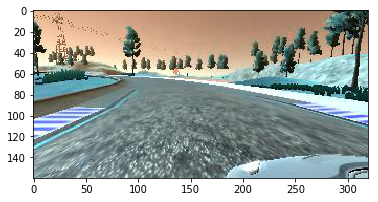

In [4]:
print(len(imagepaths))
print(len(measurements))

img= cv2.imread('P3TrainingLeft/left_2017_02_23_18_03_34_180.jpg')
plt.imshow(img)


59481
../P3RecoveryData/IMG/right_2017_02_25_15_48_12_924.jpg
59481


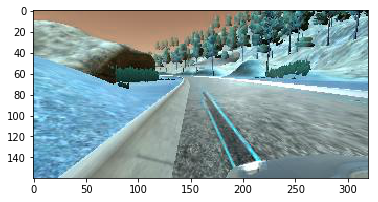

In [6]:
f = open(recovery_data)
driving_data = list(csv.reader(f, skipinitialspace=True, delimiter=',', quoting=csv.QUOTE_NONE))

for i in range (10):
    correction=0.25
    for tokens  in driving_data[1:]:
        
        if float(tokens[6])<0.1:
                continue
        for i in range(3):
            nameToken=tokens[i]
            name=nameToken.split('/')[-1]

            imageName=recovery_path+name
            imagepaths.append(imageName)
        steeringAngle=(float)(tokens[3])
        measurements.append(steeringAngle)
        measurements.append(steeringAngle+correction)
        measurements.append(steeringAngle-correction)


        '''image=plt.imread(tokens[0])
        plt.imshow(image)
        images.append(image)
        measurements.append(tokens[3])'''
print(len(imagepaths))
img=cv2.imread(imagepaths[-2])
plt.imshow(img)
print(imagepaths[-1])
print(len(measurements))






71991
../BridgeRecovery/IMG/right_2017_02_25_16_21_23_657.jpg
71991


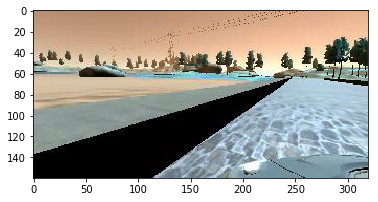

In [7]:
f = open(recovery_data2)
driving_data = list(csv.reader(f, skipinitialspace=True, delimiter=',', quoting=csv.QUOTE_NONE))

for i in range (10):
    correction=0.25
    for tokens  in driving_data[1:]:
        
        if float(tokens[6])<0.1:
                continue
        for i in range(3):
            nameToken=tokens[i]
            name=nameToken.split('/')[-1]

            imageName=recovery2_path+name
            imagepaths.append(imageName)
        steeringAngle=(float)(tokens[3])
        measurements.append(steeringAngle)
        measurements.append(steeringAngle+correction)
        measurements.append(steeringAngle-correction)


        '''image=plt.imread(tokens[0])
        plt.imshow(image)
        images.append(image)
        measurements.append(tokens[3])'''
print(len(imagepaths))
img=cv2.imread(imagepaths[-2])
plt.imshow(img)
print(imagepaths[-1])
print(len(measurements))






In [9]:
# Image cropping delimiters
HORIZON=60
BONNET=136

def crop(image):
    """
    Crop the image between the given delimiters for the
    horizon and the bonnet of the car.
    """
    shape = image.shape
    
    cropped = image[HORIZON:BONNET,0:shape[1],:]
    
    return cropped

def resize(image, resize_dim):
    return cv2.resize(image,resize_dim,cv2.INTER_AREA)
#We are using cv2.imread
def convertToYUV(image):
    new_img = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    return new_img



In [10]:
def preProcessImage(image):
    dst=crop(image)
    dst=resize(dst,(64,64))
    dst=convertToYUV(dst)
    return dst
    

In [12]:
print(len(imagepaths))
print(len(measurements))



71991
71991


In [13]:
#flip the images
augmented_images=imagepaths
augmented_measurements=measurements

    
print(len(augmented_images))
print(len(augmented_measurements))


71991
71991


In [14]:
X_train=np.array(augmented_images)
y_train=np.array(augmented_measurements)

#X_val=np.array(validation_Images)
#y_val=np.array(validation_Measurements)



In [15]:
print(X_train.shape)
print(y_train.shape)

(71991,)
(71991,)


In [16]:
from keras.optimizers import Adam



# Training parameters
learning_rate = 1e-4
number_of_epochs = 7
batch_size = 64
number_of_samples_per_epoch = 20032
validation_split = 0.3

# Images size
resize_x=64
resize_y=64

# Input layer shape
ch, row, col = 3, resize_x, resize_y

# Model definition taken from Nvidia's paper at:
# http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf
def nv():
    model = Sequential()
    
    model.add(Lambda(lambda x: x/127.5 - 1.,
            input_shape=(col,row,ch),
            output_shape=(col,row,ch)))
    
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(64, 3, 3, border_mode="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(64, 3, 3, border_mode="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    
    model.add(Flatten())
    model.add(Dropout(.2))
    model.add(Activation('relu'))
    model.add(Dense(1164))
    model.add(Dropout(.5))
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Dropout(.5))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Dropout(.5))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Dropout(.5))
    model.add(Activation('relu'))
    model.add(Dense(1))
    return model

# construct the selected model and print it out
model = nv()
model.summary()
model.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 64, 64, 3)     0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 32, 32, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 32, 24)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 31, 31, 24)    0           activation_1[0][0]               
___________________________________________________________________________________________

In [17]:
def generate_training_data(imagepaths, angles,batch_size=128):
    '''
    method for the model training data generator to load, process, and distort images, then yield them to the
    model. if 'validation_flag' is true the image is not distorted. also flips images with turning angle magnitudes of greater than 0.33, as to give more weight to them and mitigate bias toward low and zero turning angles
    '''
    images, angles = shuffle(imagepaths, angles)
    X,y = ([],[])
    while True:       
        for i in range(len(angles)):
           
            angle = angles[i]
            img = cv2.imread(images[i])
            img=preProcessImage(img)
            
            X.append(img)
            y.append(angle)
            if len(X) == batch_size:
                yield (np.array(X), np.array(y))
                X, y = ([],[])
                images, angles = shuffle(images, angles)
            if abs(angle) > 0.33:
                img = cv2.flip(img, 1)
                angle *= -1
                X.append(img)
                y.append(angle)
                if len(X) == batch_size:
                    yield (np.array(X), np.array(y))
                    X, y = ([],[])
                    images, angles = shuffle(images, angles)
           

In [18]:

print(len(X_train))
print(len(y_train))

71991
71991


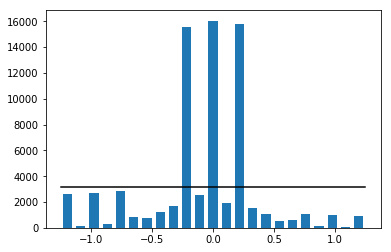

In [19]:

# print a histogram to see which steering angle ranges are most overrepresented
num_bins = 23
avg_samples_per_bin = len(y_train)/num_bins
hist, bins = np.histogram(y_train, num_bins)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(y_train), np.max(y_train)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()



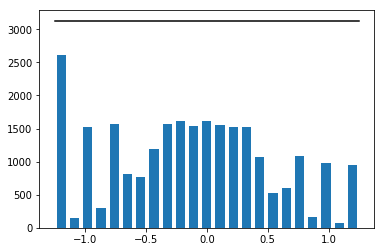

After: (25310,) (25310,)


In [20]:
# determine keep probability for each bin: if below avg_samples_per_bin, keep all; otherwise keep prob is proportional
# to number of samples above the average, so as to bring the number of samples for that bin down to the average
keep_probs = []
target = avg_samples_per_bin * .5
for i in range(num_bins):
    if hist[i] < target:
        keep_probs.append(1.)
    else:
        keep_probs.append(1./(hist[i]/target))
remove_list = []
for i in range(len(y_train)):
    for j in range(num_bins):
        if y_train[i] > bins[j] and y_train[i] <= bins[j+1]:
            # delete from X and y with probability 1 - keep_probs[j]
            if np.random.rand() > keep_probs[j]:
                remove_list.append(i)
X_train = np.delete(X_train, remove_list, axis=0)
y_train = np.delete(y_train, remove_list)

# print histogram again to show more even distribution of steering angles
hist, bins = np.histogram(y_train, num_bins)
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(y_train), np.max(y_train)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()

print('After:', X_train.shape, y_train.shape)

In [21]:

from sklearn.model_selection import train_test_split
X_train, y_train = shuffle(X_train, y_train)

X_train, X_val, y_train,y_val=train_test_split(X_train,y_train,test_size=0.2)

In [22]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

20248
20248
5062
5062


In [23]:

train_generator = generate_training_data(X_train,y_train)
validation_generator= generate_training_data(X_val,y_val)



In [24]:
model=nv()

model.compile(optimizer='adam',loss='mse')

history = model.fit_generator(train_generator,
                              
                  samples_per_epoch=1280,
                  nb_epoch=15,
                  validation_data=validation_generator,
                  nb_val_samples=len(X_val),
                  verbose=1)

model.save('mymodel9.h5')

Epoch 1/15
1280/1280 [==============================] - 6s - loss: 0.5795 - val_loss: 0.5710
Epoch 2/15
1280/1280 [==============================] - 4s - loss: 0.5710 - val_loss: 0.5097